In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

titanic_data = pd.read_csv('https://raw.githubusercontent.com/Grossmend/CSV/master/titanic/data.csv')

In [2]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
survived_groupby_classes = titanic_data[titanic_data['Survived'] == 1].groupby('Pclass')['Survived'].count()

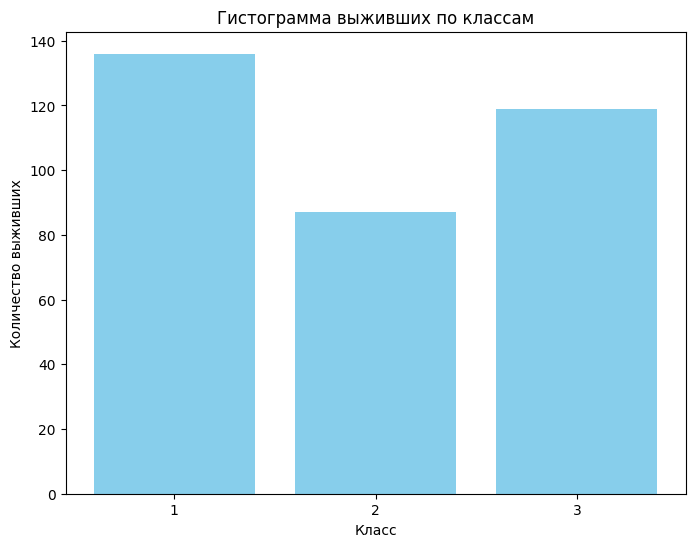

In [16]:
plt.figure(figsize=(8, 6))

plt.bar(survived_groupby_classes.index, survived_groupby_classes.values, color='skyblue')
plt.xticks(survived_groupby_classes.index)

plt.xlabel('Класс')
plt.ylabel('Количество выживших')
plt.title('Гистограмма выживших по классам')

plt.show()

In [17]:
person_by_sex = titanic_data[titanic_data['Survived'] == 1].groupby('Sex')['Survived'].count()

In [7]:
person_by_sex

Sex
female    233
male      109
Name: Survived, dtype: int64

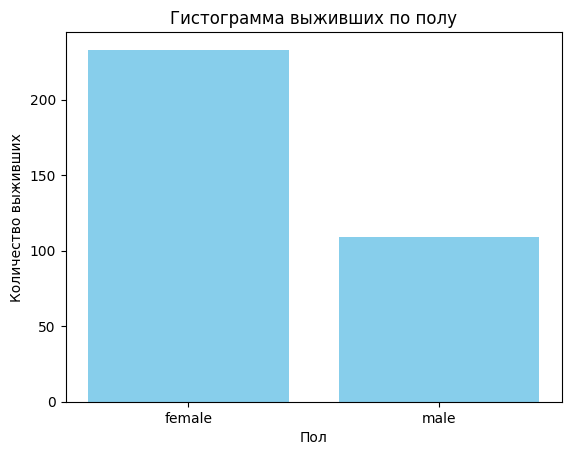

In [24]:
plt.bar(person_by_sex.index, person_by_sex.values, color='skyblue')
plt.xticks(person_by_sex.index)

plt.xlabel('Пол')
plt.ylabel('Количество выживших')
plt.title('Гистограмма выживших по полу')

plt.show()

In [18]:
titanic_data['Type_port'] = 0
titanic_data.loc[titanic_data['Embarked'] == 'C', 'Type_port'] = 1
titanic_data.loc[titanic_data['Embarked'] == 'Q', 'Type_port'] = 2
titanic_data.loc[titanic_data['Embarked'] == 'S', 'Type_port'] = 3

port_df = titanic_data[['Pclass','Fare','Type_port']]
port_df.head()

,Pclass,Fare,Type_port
0,3,7.2500,3
1,1,71.2833,1
2,3,7.9250,3
3,1,53.1000,3
4,3,8.0500,3


In [19]:
port_df.corr()

,Pclass,Fare,Type_port
Pclass,1.000000,-0.549500,0.173511
Fare,-0.549500,1.000000,-0.230365
Type_port,0.173511,-0.230365,1.000000


In [20]:
import re

town_data = [item.split(',') for item in titanic_data['Name']]

mates_data = [item[1].split('(') for item in town_data]
names_data = ['' for _ in mates_data]

for i in range(len(mates_data)):
    try:
        names_data[i] = mates_data[i]
        mates_data[i] = mates_data[i][1][:-1]
    except:
        names_data[i] = mates_data[i]
        mates_data[i] = ''

titanic_data['Town'] = [item[0] for item in town_data]
titanic_data['New_name'] = [item[0] for item in names_data]
titanic_data['Mates'] = [item for item in mates_data]
titanic_data[['Town','New_name','Mates']]

,Town,New_name,Mates
0,Braund,Mr. Owen Harris,
1,Cumings,Mrs. John Bradley,Florence Briggs Thayer
2,Heikkinen,Miss. Laina,
3,Futrelle,Mrs. Jacques Heath,Lily May Peel
4,Allen,Mr. William Henry,
...,...,...,...
886,Montvila,Rev. Juozas,
887,Graham,Miss. Margaret Edith,
888,Johnston,"Miss. Catherine Helen ""Carrie""",
889,Behr,Mr. Karl Howell,


In [23]:
live_df = titanic_data[(titanic_data['Survived'] == 1) & ((titanic_data['Sex'] == 'female') | (titanic_data['Age'] < 19) | (titanic_data['Age'] > 50))]
live_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type_port,Town,New_name,Mates
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Cumings,Mrs. John Bradley,Florence Briggs Thayer
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,Heikkinen,Miss. Laina,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,Futrelle,Mrs. Jacques Heath,Lily May Peel
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,Johnson,Mrs. Oscar W,Elisabeth Vilhelmina Berg
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,Nasser,Mrs. Nicholas,Adele Achem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,1,Abelson,Mrs. Samuel,Hannah Wizosky
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,1,Najib,"Miss. Adele Kiamie ""Jane""",
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1,Potter,Mrs. Thomas Jr,Lily Alexenia Wilson
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,3,Shelley,Mrs. William,Imanita Parrish Hall


In [29]:
print(f'Live {live_df.shape[0]} from {titanic_data.shape[0]}:')

live_female_df = live_df[(live_df['Sex'] == 'female')]
live_young_df = live_df[(live_df['Age'] < 19)]
live_old_df = live_df[(live_df['Age'] > 50)]

all_female_df = titanic_data[(titanic_data['Sex'] == 'female')]
all_young_df = titanic_data[(titanic_data['Age'] < 19)]
all_old_df = titanic_data[(titanic_data['Age'] > 50)]

print('Chance of surviving:')

print(f'{round(live_female_df.shape[0]/all_female_df.shape[0]*100,2)} % for female ({len(live_female_df)} from {len(all_female_df)})')
print(f'{round(live_young_df.shape[0]/all_young_df.shape[0]*100,2)} % for young ({len(live_young_df)} from {len(all_young_df)})')
print(f'{round(live_old_df.shape[0]/all_old_df.shape[0]*100,2)} % for old ({len(live_old_df)} from {len(all_old_df)})')

print('Categories of survived:')

print(f'{round(live_female_df.shape[0]/live_df.shape[0]*100,2)} % for female ({len(live_female_df)} from {len(live_df)})')
print(f'{round(live_young_df.shape[0]/live_df.shape[0]*100,2)} % for young ({len(live_young_df)} from {len(live_df)})')
print(f'{round(live_old_df.shape[0]/live_df.shape[0]*100,2)} % for old ({len(live_old_df)} from {len(live_df)})')

Live 263 from 891:
Chance of surviving:
74.2 % for female (233 from 314)
50.36 % for young (70 from 139)
34.38 % for old (22 from 64)
Categories of survived:
88.59 % for female (233 from 263)
26.62 % for young (70 from 263)
8.37 % for old (22 from 263)


In [30]:
live_2_df = titanic_data[(titanic_data['Survived'] == 1) & ((titanic_data['Sex'] == 'male') | (titanic_data['Age'] < 19) | (titanic_data['Age'] > 50))]
live_2_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type_port,Town,New_name,Mates
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,Nasser,Mrs. Nicholas,Adele Achem
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,3,Sandstrom,Miss. Marguerite Rut,
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,3,Bonnell,Miss. Elizabeth,
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,3,Hewlett,Mrs.,Mary D Kingcome)
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,3,Williams,Mr. Charles Eugene,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,3,Daly,Mr. Peter Denis,
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,3,Johnson,Master. Harold Theodor,
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,1,Najib,"Miss. Adele Kiamie ""Jane""",
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1,Potter,Mrs. Thomas Jr,Lily Alexenia Wilson


In [31]:
print(f'Live {live_2_df.shape[0]} from {titanic_data.shape[0]}:')

live_2_male_df = live_2_df[(live_2_df['Sex'] == 'male')]
live_2_young_df = live_2_df[(live_2_df['Age'] < 19)]
live_2_old_df = live_2_df[(live_2_df['Age'] > 50)]

all_male_df = titanic_data[(titanic_data['Sex'] == 'male')]

print('Chance of surviving:')

print(f'{round(live_2_male_df.shape[0]/all_male_df.shape[0]*100,2)} % for male ({len(live_2_male_df)} from {len(all_male_df)})')
print(f'{round(live_2_young_df.shape[0]/all_young_df.shape[0]*100,2)} % for young ({len(live_2_young_df)} from {len(all_young_df)})')
print(f'{round(live_2_old_df.shape[0]/all_old_df.shape[0]*100,2)} % for old ({len(live_2_old_df)} from {len(all_old_df)})')

print('Categories of survived:')

print(f'{round(live_2_male_df.shape[0]/live_2_df.shape[0]*100,2)} % for male ({len(live_2_male_df)} from {len(live_2_df)})')
print(f'{round(live_2_young_df.shape[0]/live_2_df.shape[0]*100,2)} % for young ({len(live_2_young_df)} from {len(live_2_df)})')
print(f'{round(live_2_old_df.shape[0]/live_2_df.shape[0]*100,2)} % for old ({len(live_2_old_df)} from {len(live_2_df)})')

Live 171 from 891:
Chance of surviving:
18.89 % for male (109 from 577)
50.36 % for young (70 from 139)
34.38 % for old (22 from 64)
Categories of survived:
63.74 % for male (109 from 171)
40.94 % for young (70 from 171)
12.87 % for old (22 from 171)
